<h1>KALMAN FILTER</h1>

<p>Main purpose is to demonstrate the operation of the filter in a variety of cases starting from a very simple one<br>
All the examples are developed in reference to a discrete time implementation making the code simpler.</p>

<p>The first example regards the identification of a constant quantity within a noisy signal.<br>
We start assuming we do not know the value and we guess it at the beginning equal to 0.</p>

<p>The structure of the case is depicted in the following picture</p>


<img src="Kalman_ex1.svg" alt="drawing" width="600"  height="300"/>

<p>In the first execution we suppose to know the correct value and then the initial condition is correct.<br> 
As result the KF is simply filtering the noise</p>

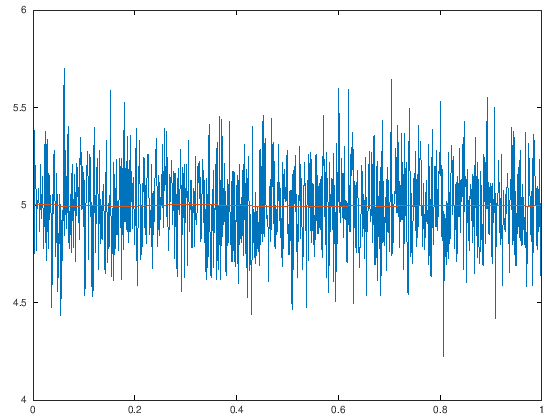

In [1]:
% Set the Octave Engine to run the simulation
SetSimulationEnvironment;

% Simulation Parameters
% Start time
tini = 0;
% End time
tfinal = 1;
% Time Step
dt = 0.001;
% Number of data flows in the schematic
nflows = 4;
% Sampling time for discrete time
Ts = 0.001;

% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);

% Model noise
Sw = 0;

% Measurement noise
Sv = 0.2;

% System definition
F = 1;
G = 0;
C = 1;
Q = Sw;
R = Sv;

% Initial guessed condition
xo = 5;

% Uncertainty on the initial condition
Pk = 0.001;

% List of components
c1{1} = WhiteNoise(1,Sv);
c1{2} = Constant(2,5);
c1{3} = Sum(1,2,3,1,1);
% c = KalmanFilter(in,out,nin,nmeas,T,F,G,C,Q,R,xo,Pk)
c1{4} = KalmanFilter(3,4,0,1,Ts,F,G,C,Q,R,xo,Pk);



sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([3 4]);
plot(out1(1,:),out1(2,:),out1(1,:),out1(3,:));


<p>Now let us suppose that the initial value is wrong.<br> 
As result the KF is not only filtering the noise but also estimating the constant value</p>

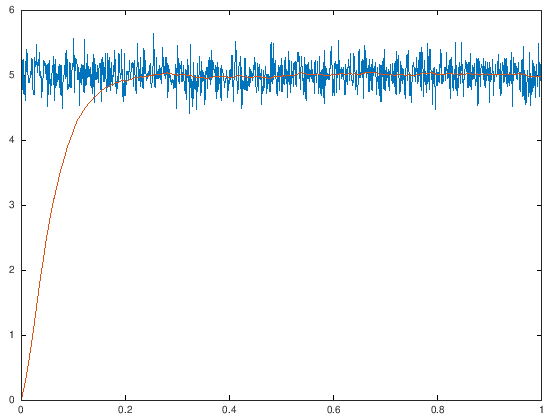

In [2]:

% Instance of the simulation schematic
sc2 = Schema(tini,tfinal,dt,nflows);


% Model noise
Sw = 0.0001;

% Measurement noise
Sv = 0.2;

% System definition
F = 1;
G = 0;
C = 1;
Q = Sw;
R = Sv;

% Initial guessed condition
xo = 0;

% Uncertainty on the initial condition
Pk = 0.001;

% List of components
c2{1} = WhiteNoise(1,0.2);
c2{2} = Constant(2,5);
c2{3} = Sum(1,2,3,1,1);
% c = KalmanFilter(in,out,nin,nmeas,T,F,G,C,Q,R,xo,Pk)
c2{4} = KalmanFilter(3,4,0,1,Ts,F,G,C,Q,R,xo,Pk);



sc2.AddListComponents(c2);

% Run the schematic and plot
out2 = sc2.Run([3 4]);
plot(out2(1,:),out2(2,:),out2(1,:),out2(3,:));



<p>Let us now consider a dynamic condition.<br>
The system is now a perfect oscillator and we measure the output of such system.<br>
We observe a sinusoidal signal with noise<br>
The KF extracts the sinusoidal oscillation from the noise signal</p>

<html>
   <head>
      <title>Sinusoidal Measurement</title>
   </head>

   <body>
      <img src="Kalman_ex2.svg" alt="Noisy Constant Measurement" width="800"
         height="120">
   </body>
</html>

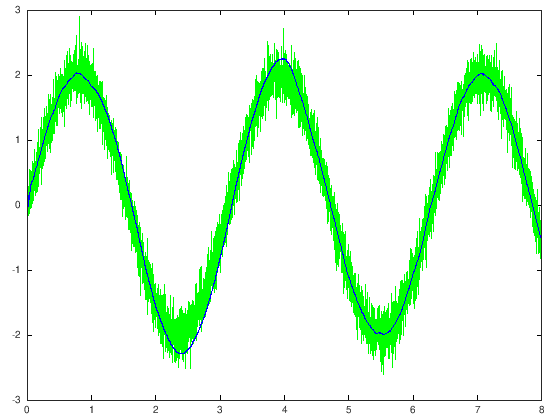

In [3]:
nflows = 5;
tfinal = 8;

% Instance of the simulation schematic
sc3 = Schema(tini,tfinal,dt,nflows);

% Measurement noise
Sv = 0.2;

om = 2;

% System definition
F = [cos(om*Ts) sin(om*Ts)/om; -om*sin(om*Ts) cos(om*Ts)];


G = [0; 0];
C = [1 0];
Q = [Ts*Ts*Ts/3 Ts*Ts/2; Ts*Ts/2 Ts];
R = Sv;

% Initial guessed condition
xo = [0; 1];

% Uncertainty on the initial condition
Pk = [1000 0;0 1000];

% List of components
c3{1} = WhiteNoise(1,Sv);
c3{2} = SinusoidalSignalSource(2,2,2,0);
c3{3} = Sum(1,2,3,1,1);
% c = KalmanFilter(in,out,nin,nmeas,T,F,G,C,Q,R,xo,Pk)
c3{4} = KalmanFilter(3,[4 5],0,1,Ts,F,G,C,Q,R,xo,Pk);


sc3.AddListComponents(c3);

% Run the schematic and plot
out3 = sc3.Run([3 4]);

plot(out3(1,:),out3(2,:),'g',out3(1,:),out3(3,:),'b')

<p>The same problem is here studied in continuous time and using a steady-state kalman filter to perform the same operation</p>

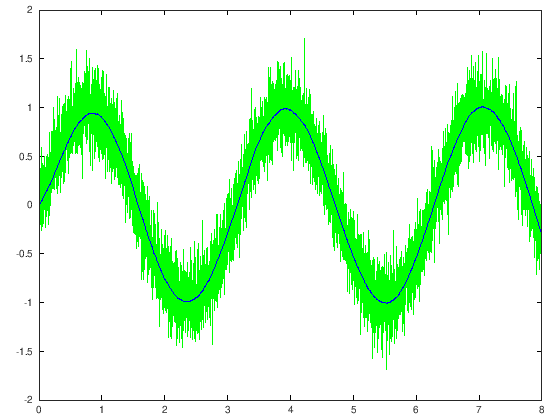

In [4]:

nflows = 4;

% Instance of the simulation schematic
sc4 = Schema(tini,tfinal,dt,nflows);

% Measurement noise
Sv = 0.2;

% System definition
A = [0 1; -om*om 0];

C = [1 0];
Q = 0;
R = Sv;

Kk = [4; 8];
Acl = A-Kk*C;

B = Kk;

% Initial guessed condition
xo = [0; 1];


% List of components
c4{1} = WhiteNoise(1,Sv);
c4{2} = SinusoidalSignalSource(2,1,2,0);
c4{3} = Sum(1,2,3,1,1);
c4{4} = StateSpace(3,4,Acl,B,C,0,xo);


sc4.AddListComponents(c4);

% Run the schematic and plot
out4 = sc4.Run([3 4]);

plot(out4(1,:),out4(2,:),'g',out4(1,:),out4(3,:),'b')

<p>Another important element is to compare KF with a regular filter</p>

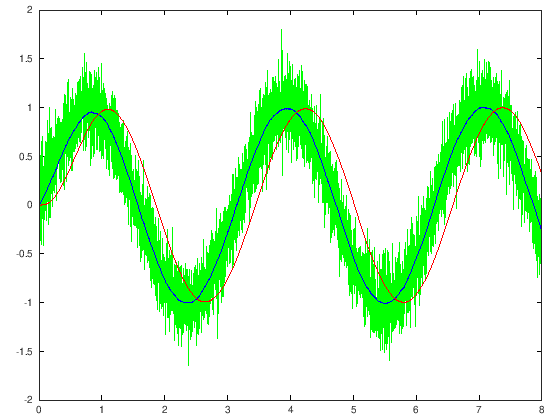

In [5]:
nflows = 5;

% Instance of the simulation schematic
scn = Schema(tini,tfinal,dt,nflows);

% Measurement noise
Sv = 0.2;

% System definition
A = [0 1; -om*om 0];

C = [1 0];
Q = 0;
R = Sv;

Kk = [4; 8];
Acl = A-Kk*C;

B = Kk;

% Initial guessed condition
xo = [0; 1];

% Standard filter
omo = 5;
csi = 0.7;
Numfil = [omo*omo];
Denfil = [1 2*csi*omo omo*omo];

% List of components
cn{1} = WhiteNoise(1,Sv);
cn{2} = SinusoidalSignalSource(2,1,2,0);
cn{3} = Sum(1,2,3,1,1);
cn{4} = StateSpace(3,4,Acl,B,C,0,xo);
cn{5} = TransferFunction(3,5,Numfil,Denfil);



scn.AddListComponents(cn);

% Run the schematic and plot
outn = scn.Run([3 4 5]);

plot(outn(1,:),outn(2,:),'g',outn(1,:),outn(3,:),'b',outn(1,:),outn(4,:),'r')

<p>Finally as a last example we consider the estimate of a discrete time system with also an external input</p>

<html>
   <head>
      <title>Discrete-time system</title>
   </head>

   <body>
      <img src="Kalman_ex3.svg" alt="DT System" width="800"
         height="120">
   </body>
</html>

In [6]:
% Bigger system
nflows = 7;

% Instance of the simulation schematic
sc5 = Schema(tini,tfinal,dt,nflows);

% Model noise
Sw = 0.2;

% Measurement noise
Sv = 1.2;

% System definition
F = 0.5;
G = 1;
C = 1;
Q = Sw;
R = Sv;

% Initial guessed condition
xo = [0];
xos = [0; 0];

% Uncertainty on the initial condition
Pk = [0.001];

% List of components
c5{1} = WhiteNoise(1,Sw);
c5{2} = SinusoidalSignalSource(2,2,2,0);
c5{3} = Sum(1,2,3,1,1);
% c = DTStateSpace(in,out,A,B,C,D,T)
c5{4} = DTStateSpace(3,4,F,G,C,0,Ts,xos);
c5{5} = WhiteNoise(5,Sv);
c5{6} = Sum(4,5,6,1,1);
% c = KalmanFilter(in,out,nin,nmeas,T,F,G,C,Q,R,xo,Pk)
c5{7} = KalmanFilter([3 6],7,1,1,Ts,F,G,C,Q,R,xo,Pk);


sc5.AddListComponents(c5);

% Run the schematic and plot
out5 = sc5.Run([3 4 6 7]);




<p>First let us consider the input of the system with noise</p>

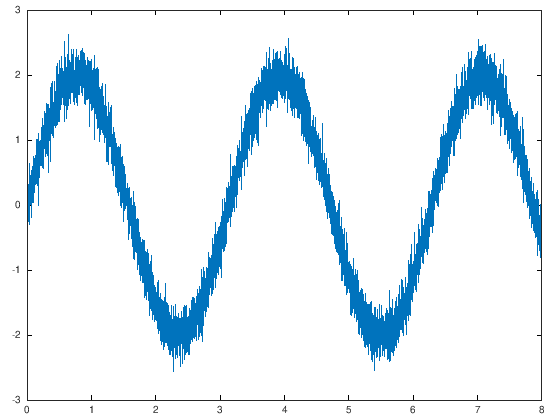

In [7]:
plot(out5(1,:),out5(2,:));

<p>Then the output of the system</p>

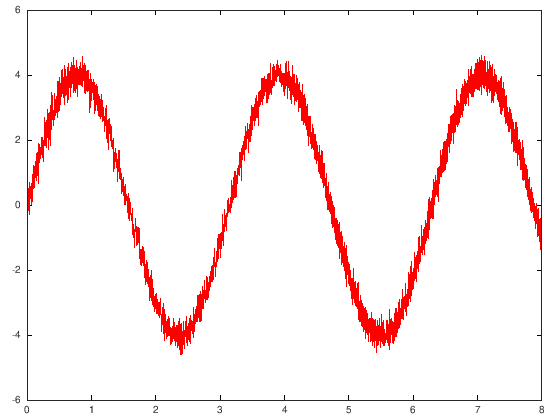

In [8]:
plot(out5(1,:),out5(3,:),'r');

<p>Then its measurement with noise</p>

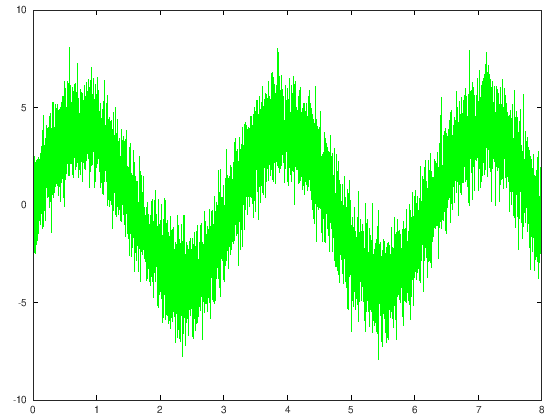

In [9]:
plot(out5(1,:),out5(4,:),'g')

<p>And finally a comparison of the output and of the estimated state</p>

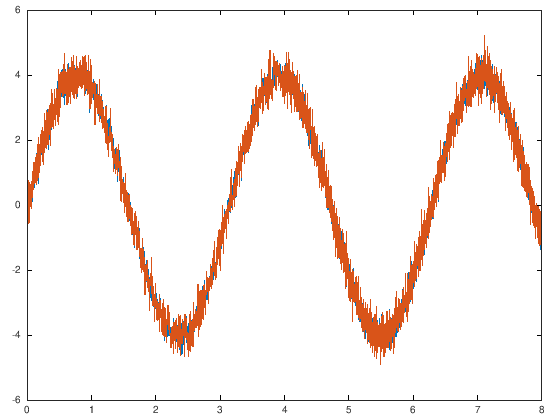

In [10]:
plot(out5(1,:),out5(3,:),out5(1,:),out5(5,:));

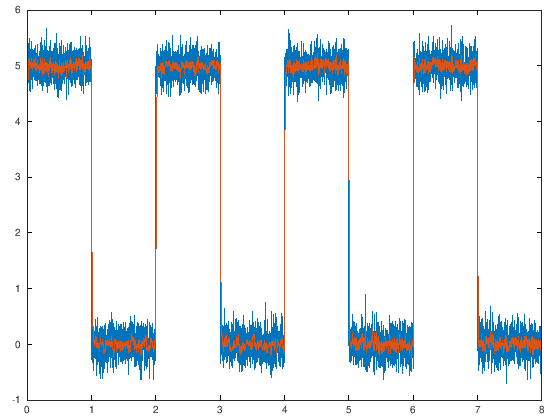

In [19]:
% Instance of the simulation schematic
sc6 = Schema(tini,tfinal,dt,nflows);


% Model noise
Sw = 0.01;

% Measurement noise
Sv = 0.2;

% System definition
F = 1;
G = 0;
C = 1;
Q = Sw;
R = Sv;

% Initial guessed condition
xo = 0;

% Uncertainty on the initial condition
Pk = 0.001;

% List of components
c6{1} = WhiteNoise(1,0.2);
c6{2} = SquareSignal(2,5,0,0.5,0.5);
c6{3} = Sum(1,2,3,1,1);
% c = KalmanFilter(in,out,nin,nmeas,T,F,G,C,Q,R,xo,Pk)
c6{4} = KalmanFilter(3,4,0,1,Ts,F,G,C,Q,R,xo,Pk);



sc6.AddListComponents(c6);

% Run the schematic and plot
out6 = sc6.Run([3 4]);
plot(out6(1,:),out6(2,:),out6(1,:),out6(3,:));


